In [167]:
import matplotlib.pyplot as plt
from snaptools import plot_tools
import numpy as np
import conversions as co

from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import h5py
from snaptools import utils
from snaptools import snapio
from snaptools import CBcm
from snaptools import manipulate
from functools import partial
from scipy import optimize
from snaptools import snapshot

%matplotlib inline
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('lines', linewidth=3)

In [18]:
def disk(r, h, I0):
    rho =  I0 * np.exp(-r / h)
    return rho.ravel()

In [122]:
def custom_plot(snap, axis, settings, plot_contours=True):
    bin_dict = snap.bin_snap(settings)
    Z2 = bin_dict['Z2']
    centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
    centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')
    
    xmax = 8
    ymax = 8
    
    im_func = settings['im_func']
    levels = np.linspace(settings['in_min'], settings['in_max'], 20)
    levels = np.append(levels, 2.8)

    im = axis.contourf(centerX, centerY, im_func(Z2),
                       colors = [(198/255.,219/255.,239/255., 1),
                                 (158/255.,202/255.,225/255., 1),
                                 cmap(0), cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(1)],
                       vmin=settings['in_min'],
                      levels=levels[[0, 4, 8, 12, 16, -2, -1]])
    if settings['plotCompanionCOM']:
        companionCOM = bin_dict['companionCOM']
        if (np.abs(companionCOM[0]) < xmax
                and np.abs(companionCOM[1]) < ymax):
            axis.plot(companionCOM[0], companionCOM[1], marker='o', ms=10)
            com1, com2, gal1id, gal2id = snap.center_of_mass('stars')

            vx = snap.vel['stars'][gal2id, 0].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))
            vy = snap.vel['stars'][gal1id, 1].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))

            axis.arrow(companionCOM[0], companionCOM[1],
                       vx, vy,
                       head_width=0.25, head_length=0.5, fc='k', ec='k')

    if plot_contours:
        measurements = manipulate.fit_contours(Z2, settings, plot=True)
        eccs = measurements['eccs']
        majors = measurements['majors']
        minors = measurements['minors']
        axes_ratios = measurements['axes_ratios']
        xCenters = measurements['xCenters']
        yCenters = measurements['yCenters']
        ellipses = measurements['ellipses']
        angles = measurements['angles']
        wherebar = np.where(eccs > 0.5)[0]
        if len(wherebar) > 0:
            bar_ind = np.max(wherebar)
            for i, (e,
                    major,
                    minor,
                    ecc,
                    axis_ratio,
                    xCenter,
                    yCenter,
                    angle) in enumerate(zip(ellipses,
                                            majors,
                                            minors,
                                            eccs,
                                            axes_ratios,
                                            xCenters,
                                            yCenters,
                                            angles)):
                e = Ellipse([xCenter, yCenter],
                             major,
                             minor,
                             angle=-angle,
                             fill=False)
                if i == bar_ind:
                    e.set_color('#ffffbf')
                    print e
                    #axis.plot(yCenter, xCenter, 'b.', ms=5)
                    axis.add_artist(e)
                elif i == 0:
                    e.set_color('black')
                    #axis.plot(yCenter, xCenter, 'r+', ms=5, zorder=10)
                    axis.add_artist(e)
                #elif i == 10:
                    #print major, minor

                elif i in [4, 8, 12, 16, 20]:
                    e.set_color('#fc8d59')
                    axis.add_artist(e)
                #if (i==0) or ((major != majors[i-1]) and (minor != minors[i-1])):
                #    ell_art = axis.add_artist(e)
            
    if plot_contours:
        return im, measurements
    else:
        return im


In [119]:
ICfolder = "/usr/users/spardy/coors2/hpc_backup/working/LMC_Dehn/"

ICsnap = snapio.load_snap('{:s}snap_010'.format(ICfolder))
settings['log_scale'] = False
bin_dict = ICsnap.bin_snap(settings)
Z2 = bin_dict['Z2']
centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')
R = np.sqrt(centerX**2 + centerY**2)
popt, pcov = optimize.curve_fit(disk, R, Z2.ravel(), p0=None)


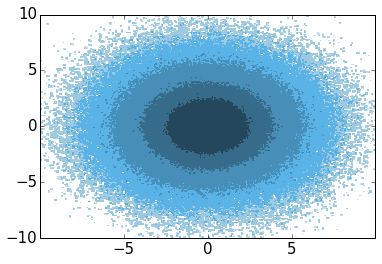

In [123]:
settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 
#im_func = partial(ndimage.gaussian_filter, sigma=0.5)
def im_func(x):
    return x
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units
fig, axis = plt.subplots(1)
im, measurements = custom_plot(ICsnap, axis, settings) 


## Bar Snapshot

Ellipse(0.00896516393443,-0.110623719262;3.18800357351x1.18957328338)


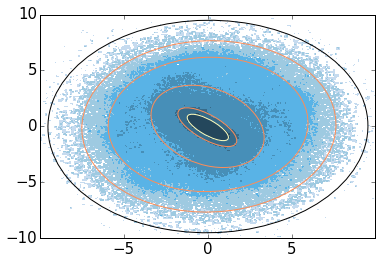

In [125]:
settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['first_only'] = True
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap 
#im_func = partial(ndimage.gaussian_filter, sigma=0.5)
def im_func(x):
    return x
settings['im_func'] = im_func
UnitTime_in_Gyr = 0.9784620750887875  # standard Gadget Units
fig, axis = plt.subplots(1)
folder = "/usr/users/spardy/coors2/working/Dehnen_LMC/" +\
         "stars2gas/output_stars2gas/"
    
snapnum = 74

snap = snapio.load_snap('{:s}snap_{:03d}.hdf5'.format(folder, snapnum))
com1, com2, idgal1, idgal2 = snap.center_of_mass('stars')
im, measurements = custom_plot(snap, axis, settings) 
points = snap.pos['stars'][:, 0:2]

In [126]:
eccs = measurements['eccs']
majors = measurements['majors']
minors = measurements['minors']
axes_ratios = measurements['axes_ratios']
xCenters = measurements['xCenters']
yCenters = measurements['yCenters']
ellipses = measurements['ellipses']
angles = measurements['angles']

bar_ind = np.max(np.where(eccs > 0.5)[0])
e = Ellipse([xCenters[bar_ind], yCenters[bar_ind]],
             majors[bar_ind],
             minors[bar_ind],
             angle=-angles[bar_ind],
             fill=False)
# Argument 0 to points_in_path must be an Nx2 numpy array
inside_bar = [e.contains_point(point-com1[0:2]) for point in points]
not_in_bar = np.where(np.array(inside_bar) == 0)
in_bar = np.nonzero(np.array(inside_bar))
ids_in_bar = snap.ids['stars'][in_bar]
ids_not_in_bar = snap.ids['stars'][not_in_bar]

## Make two disks

In [177]:
#bar offset
bar_offset = [0, 2, 0]
disk_offset = [0, 0, 0]
bar_off_pos = np.append(ICsnap.pos['stars']+disk_offset, snap.pos['stars'][in_bar]-com1+bar_offset, axis=0)
bar_off_masses = np.append(ICsnap.masses['stars'], snap.masses['stars'][in_bar], axis=0)
bar_off_vel = np.append(ICsnap.vel['stars'], snap.vel['stars'][in_bar], axis=0)
maxid = np.max(ICsnap.ids['stars'])+1
bar_off_ids = np.append(ICsnap.ids['stars'], np.arange(maxid, maxid+len(in_bar)), axis=0)

Snap = snapshot.Snapshot()
Snap.header = ICsnap.header
Snap.header['nall'][2] += len(in_bar)
Snap.header['npart'][2] += len(in_bar)

Snap.pos['halo'] = ICsnap.pos['halo']
Snap.vel['halo'] = ICsnap.vel['halo']
Snap.ids['halo'] = np.arange(0, Snap.header['nall'][1])#ICsnap.ids['halo']
Snap.masses['halo'] = ICsnap.masses['halo']

Snap.pos['stars'] = bar_off_pos
Snap.vel['stars'] = bar_off_vel
Snap.ids['stars'] = np.arange(Snap.header['nall'][1], Snap.header['nall'][1]+Snap.header['nall'][2]) #bar_off_ids
Snap.masses['stars'] = bar_off_masses
Snap.save('/usr/users/spardy/coors2/working/shiftBar/bar_offset.hdf5')
#disk offset
bar_offset = [0, 0, 0]
disk_offset = [0, 2, 0]
disk_off_pos = np.append(ICsnap.pos['stars']+disk_offset, snap.pos['stars'][in_bar]-com1+bar_offset, axis=0)
disk_off_masses = np.append(ICsnap.masses['stars'], snap.masses['stars'][in_bar], axis=0)
disk_off_vel = np.append(ICsnap.vel['stars'], snap.vel['stars'][in_bar], axis=0)
disk_off_ids = np.append(ICsnap.ids['stars'], np.arange(maxid, maxid+len(in_bar)), axis=0)

Snap = snapshot.Snapshot()
Snap.header = ICsnap.header
Snap.header['nall'][2] += len(in_bar)
Snap.header['npart'][2] += len(in_bar)

Snap.pos['halo'] = ICsnap.pos['halo']
Snap.vel['halo'] = ICsnap.vel['halo']
Snap.ids['halo'] = np.arange(0, Snap.header['nall'][1])#ICsnap.ids['halo']
Snap.masses['halo'] = ICsnap.masses['halo']

Snap.pos['stars'] = disk_off_pos
Snap.vel['stars'] = disk_off_vel
Snap.ids['stars'] = np.arange(Snap.header['nall'][1], Snap.header['nall'][1]+Snap.header['nall'][2])
Snap.masses['stars'] = disk_off_masses
Snap.save('/usr/users/spardy/coors2/working/shiftBar/disk_offset.hdf5')


In [176]:
print np.unique(bar_off_ids).shape
print bar_off_ids.shape

(1000001,)
(1000001,)


In [160]:
bar_off_Z, bar_off_X, bar_off_Y = manipulate.bin_particles(bar_off_pos[:, 0],
                                                          bar_off_pos[:, 1],
                                                          10, 10, bar_off_masses, 256, True)

In [161]:
disk_off_Z, disk_off_X, disk_off_Y = manipulate.bin_particles(disk_off_pos[:, 0],
                                                          disk_off_pos[:, 1],
                                                          10, 10, disk_off_masses, 256, True)

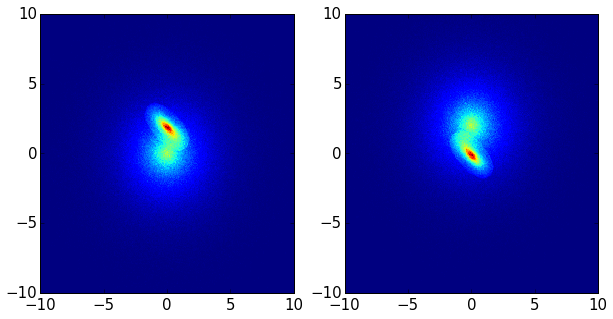

In [165]:
centerx = (bar_off_X[:-1] + bar_off_X[1:]) / 2
centery = ( bar_off_Y[:-1] +  bar_off_Y[1:]) / 2
centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pcolormesh(centerX, centerY, bar_off_Z)
axes[1].pcolormesh(centerX, centerY, disk_off_Z)

In [92]:
barZ, barX, barY = manipulate.bin_particles(points[in_bar, 0].ravel()-com1[0],
                                            points[in_bar, 1].ravel()-com1[1],
                                            10, 10, snap.masses['stars'][in_bar], 256, False)

In [93]:
diskZ, diskX, diskY = manipulate.bin_particles(points[not_in_bar, 0].ravel()-com1[0],
                                            points[not_in_bar, 1].ravel()-com1[1],
                                            10, 10, snap.masses['stars'][not_in_bar], 256, False)
poptDisk, pcovDisk = optimize.curve_fit(disk, R, diskZ.ravel(), p0=None)


In [110]:
poptDisk, pcovDisk = optimize.curve_fit(disk, R, (diskZ+barZ).ravel(), p0=None)
